# Rank Features of a Smartphone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
train1=pd.read_csv("inttrain.csv")

In [4]:
train1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
test=pd.read_csv('inttest.csv')

In [6]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
train1.shape

(2000, 21)

In [8]:
test.shape

(1000, 21)

In [9]:
dum=[]
dum=test['id']
dum

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: id, Length: 1000, dtype: int64

In [10]:
test=test.drop('id',axis=1)

In [11]:
train1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [13]:
train1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [15]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [17]:
train2=pd.read_csv("inttrain.csv")

In [18]:
train2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:>

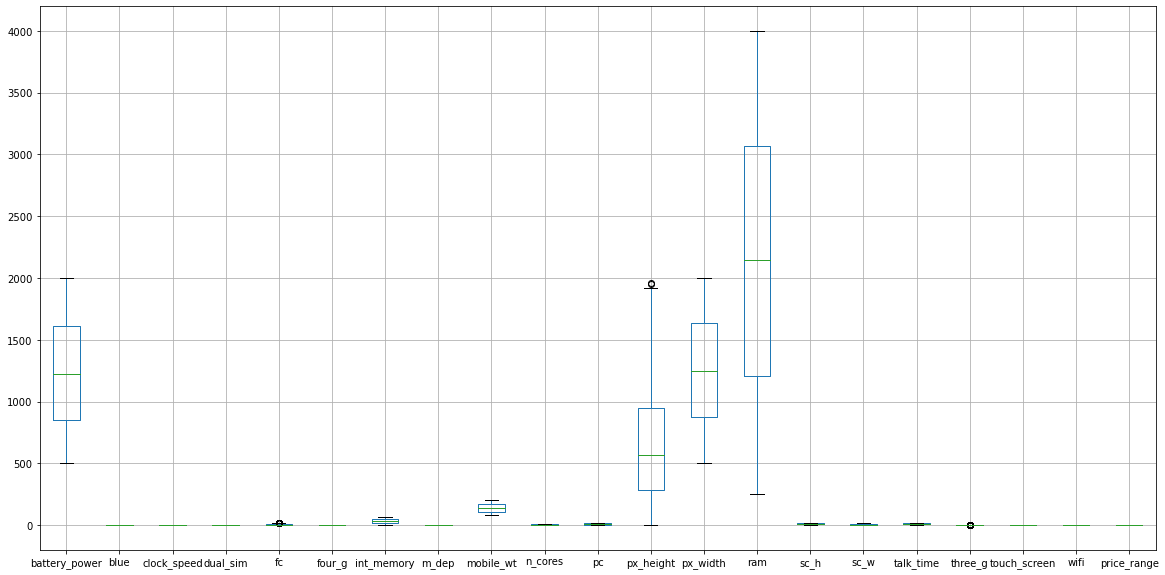

In [19]:
plt.figure(figsize=(20,10))
train1.boxplot()

In [20]:
train1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [22]:
train1.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# UNIVARIATE ANALYSIIS


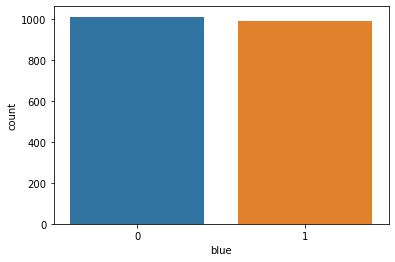

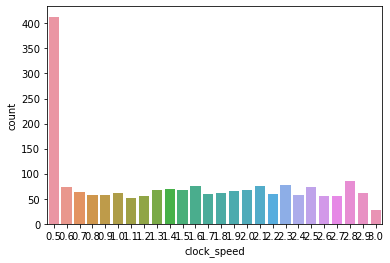

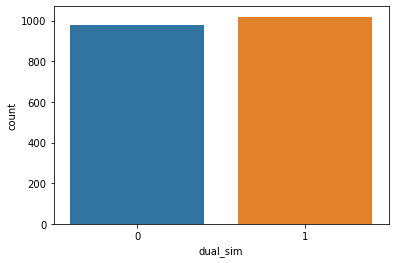

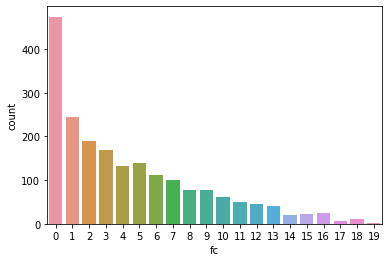

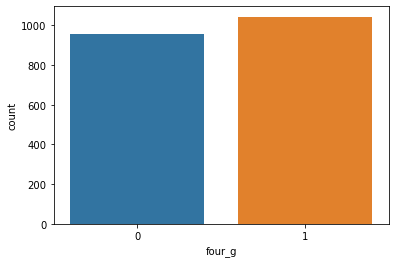

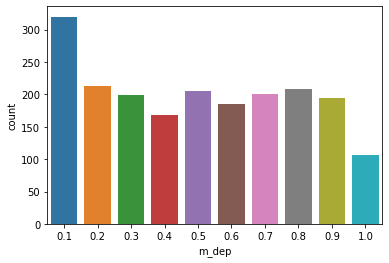

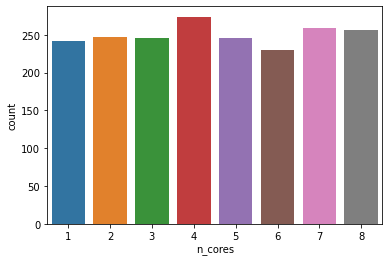

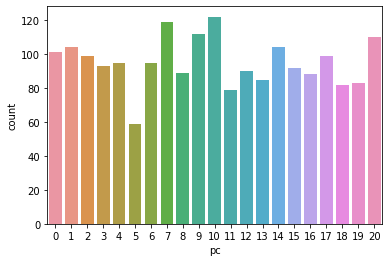

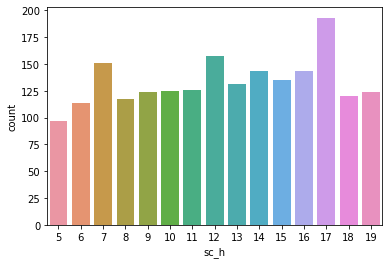

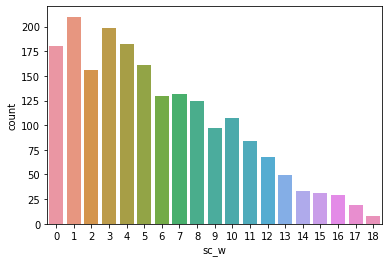

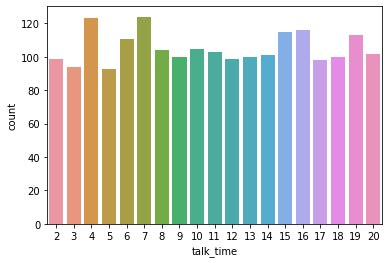

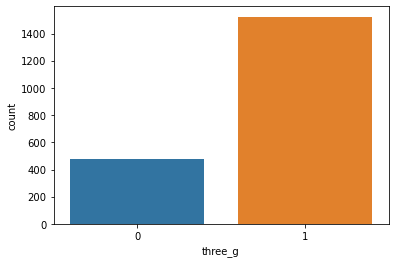

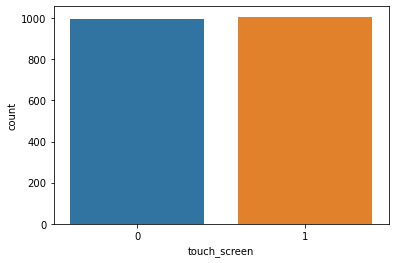

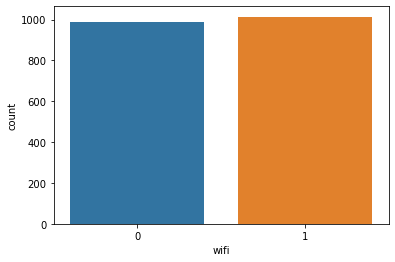

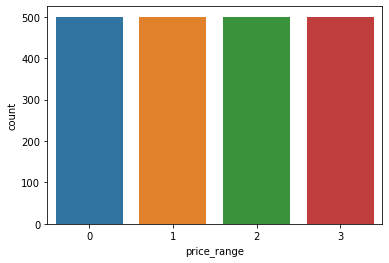

In [23]:

for i in train1:
  if(train1[i].nunique())<=30:
    sns.countplot(x=train1[i])
    plt.show()
     

In [24]:
import plotly.offline as pyo
import plotly.express as px

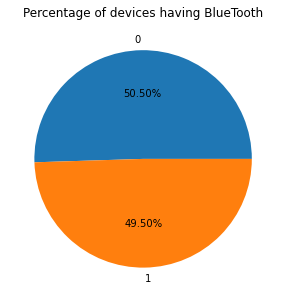

In [25]:
#Percentage of devices having BlueTooth
count=train1["blue"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having BlueTooth")
plt.show()

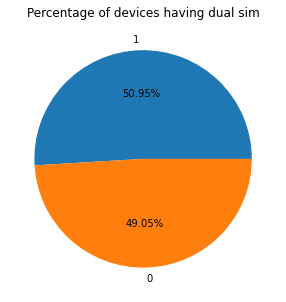

In [26]:

#Percentage of devices having dual sim
count=train1["dual_sim"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having dual sim")
plt.show()
     

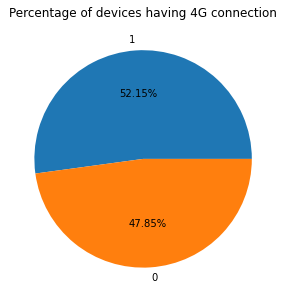

In [27]:

#Percentage of devices having 4G connection
count=train1["four_g"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 4G connection")
plt.show()
     

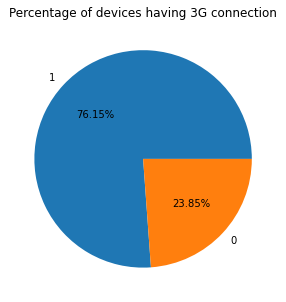

In [28]:
#Percentage of devices having 3G connection
count=train1["three_g"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having 3G connection")
plt.show()

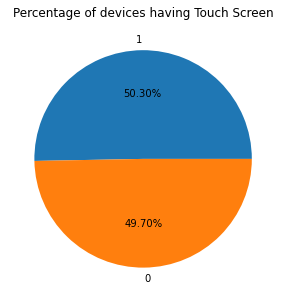

In [29]:
#Percentage of devices having Touch Screen
count=train1["touch_screen"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Touch Screen")
plt.show()

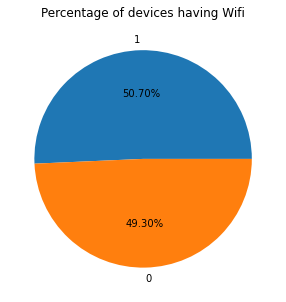

In [30]:
#Percentage of devices having Wifi
count=train1["wifi"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having Wifi")
plt.show()


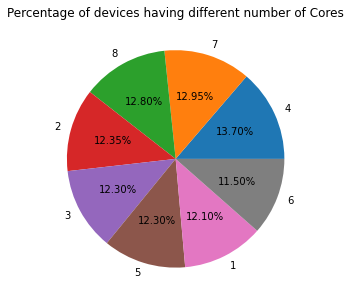

In [31]:
#Percentage of devices having different number of Cores
count=train1["n_cores"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of devices having different number of Cores")
plt.show()

# BIVARIATE DATA ANALYSIS

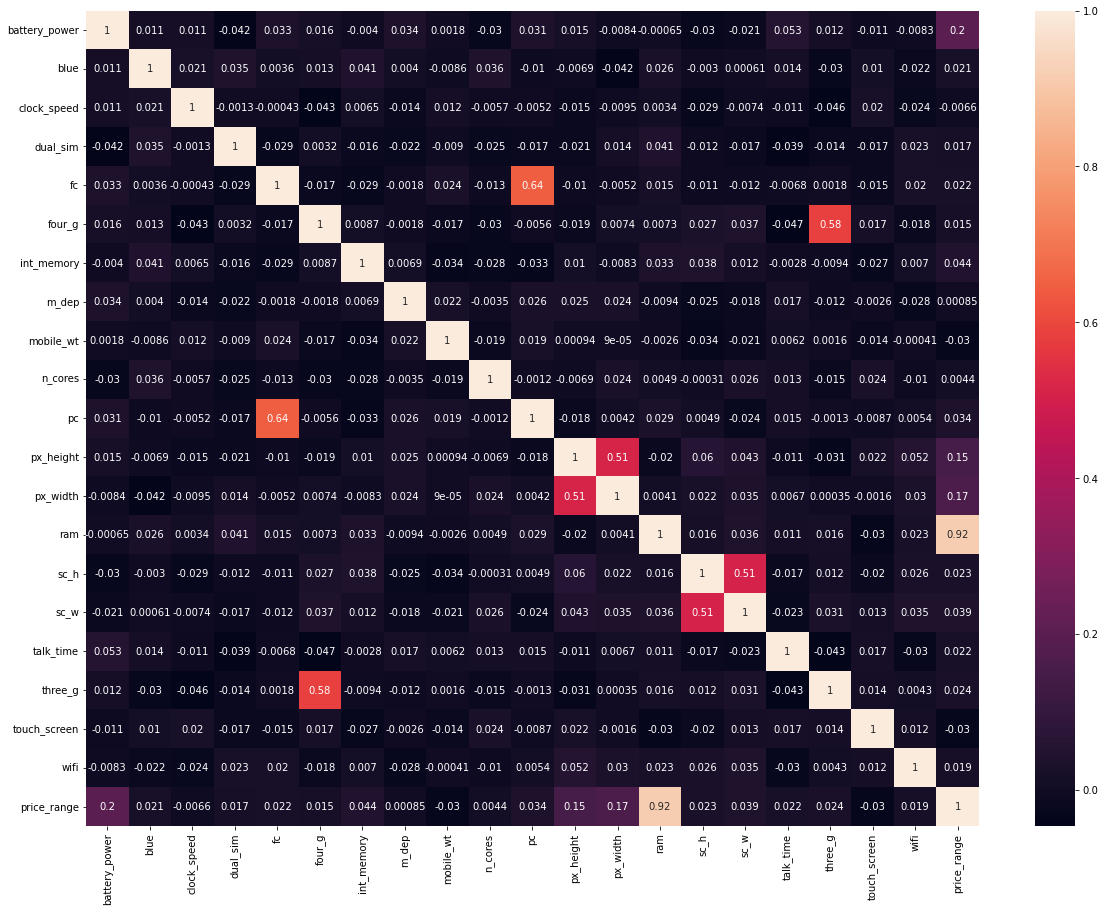

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(train1.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='ram'>

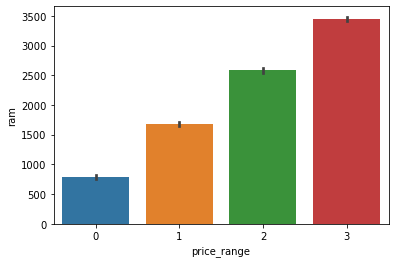

In [33]:
plt.figure()
sns.barplot(y="ram", x="price_range", data=train1)

In [34]:
df1 = train1.loc[:,['battery_power','blue','dual_sim','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi','price_range','touch_screen']]
df1

,battery_power,blue,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range,touch_screen
0,842,0,0,1,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1,0
1,1021,1,1,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2,1
2,563,1,1,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2,1
3,615,1,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,2,0
4,1821,1,0,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0,1
1996,1965,1,1,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2,1
1997,1911,0,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3,1
1998,1512,0,0,4,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0,1


In [35]:
df2 = train1.loc[:,['talk_time','three_g','wifi','clock_speed','four_g']]
df2

,talk_time,three_g,wifi,clock_speed,four_g
0,19,0,1,2.2,0
1,7,1,0,0.5,1
2,9,1,0,0.5,1
3,11,1,0,2.5,0
4,15,1,0,1.2,1
...,...,...,...,...,...
1995,19,1,0,0.5,1
1996,16,1,1,2.6,0
1997,5,1,0,0.9,1
1998,19,1,1,0.9,1


In [38]:
df3 = pd.concat([df1, df2],axis=1)
df3

,battery_power,blue,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,...,talk_time,three_g,wifi,price_range,touch_screen,talk_time,three_g,wifi,clock_speed,four_g
0,842,0,0,1,7,0.6,188,2,2,20,...,19,0,1,1,0,19,0,1,2.2,0
1,1021,1,1,0,53,0.7,136,3,6,905,...,7,1,0,2,1,7,1,0,0.5,1
2,563,1,1,2,41,0.9,145,5,6,1263,...,9,1,0,2,1,9,1,0,0.5,1
3,615,1,0,0,10,0.8,131,6,9,1216,...,11,1,0,2,0,11,1,0,2.5,0
4,1821,1,0,13,44,0.6,141,2,14,1208,...,15,1,0,1,1,15,1,0,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,2,0.8,106,6,14,1222,...,19,1,0,0,1,19,1,0,0.5,1
1996,1965,1,1,0,39,0.2,187,4,3,915,...,16,1,1,2,1,16,1,1,2.6,0
1997,1911,0,1,1,36,0.7,108,8,3,868,...,5,1,0,3,1,5,1,0,0.9,1
1998,1512,0,0,4,46,0.1,145,5,5,336,...,19,1,1,0,1,19,1,1,0.9,1


In [39]:
train1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Feature scaling

In [41]:
# Splitting train into x and y
# x denotes feature columns and y denotes target column
x=train2.drop(['price_range'],axis=1)
y=pd.DataFrame(train2['price_range'])

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(12,'Score')) 

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


[0.06124109 0.01945478 0.03365265 0.01982472 0.03146505 0.01739146
 0.03422205 0.03399248 0.03556142 0.03196543 0.03330533 0.04644982
 0.04812955 0.39842578 0.03391949 0.03376874 0.03471761 0.01436754
 0.01754955 0.02059548]


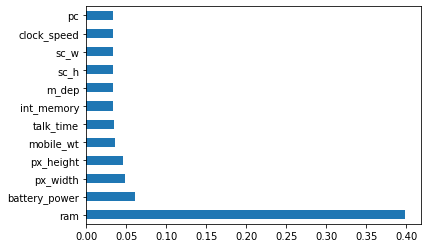

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
#plot graph of feature importances
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()
     

ram is highly correlated with price range

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [46]:
print(y_pred)

[0 2 0 3 1 2 3 0 3 3 0 1 2 3 3 2 2 2 1 0 0 1 0 2 1 1 3 3 3 0 1 0 3 0 2 3 2
 1 3 0 1 2 3 0 3 3 3 1 3 1 3 2 0 0 2 0 1 2 0 0 1 3 3 2 2 0 3 3 1 1 2 1 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 3 3 3 0 3 3 3 0 3 2 2 3 2 1 0 1 0 0 1 3 3 0 0 1 0
 0 3 3 2 1 3 3 0 2 1 3 2 2 3 3 0 3 0 2 3 0 2 2 0 2 1 1 0 2 3 1 3 3 0 0 1 2
 1 2 3 1 1 0 2 3 0 1 0 1 3 3 1 2 1 0 0 2 1 3 3 1 0 0 3 1 1 2 0 1 0 0 0 1 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 1 1 1 2 1 2 3 3 1 3 0 1 1 1 1 1 3 1 1 3 1 1 3 2
 3 0 0 3 0 2 0 0 1 0 2 3 2 1 0 2 3 1 3 3 2 3 0 3 2 2 2 3 3 1 1 3 2 1 2 3 3
 3 3 0 2 2 2 2 3 0 3 3 2 2 2 0 1 3 0 2 3 1 3 1 1 2 0 3 0 0 3 0 1 2 3 2 2 0
 1 0 0 3 3 0 1 1 2 0 3 3 3 3 1 3 2 0 3 2 3 2 0 0 1 3 1 3 1 1 2 0 3 3 2 0 2
 2 2 1 3 1 0 3 1 2 1 1 1 1 2 2 3 3 1 1 1 2 2 0 3 0 0 2 0 0 2 2 2 3 0 1 2 3
 3 3 2 3 1 2 0 2 1 3 3 0 1 3 1 3 2 3 1 0 3 2 0 0 3 3 1 2 3 2 0 3 0 2 2 2 0
 1 1 1 0 0 1 0 3 3 2 1 2 1 3 1 0 3 1 0 0 3 0 3 0 1 1 2 3 0 2 0 2 1 3 3 1 3
 1 2 1 0 3 2 0 2 2 2 2 2 1 1 2 3 1 0 3 1 1 1 3 3 3 2 0 2 2 0 1 2 3 1 2 0 0
 0 2 3 0 1 2 2 2 3 1 2 2 

In [47]:
from sklearn.metrics import f1_score,accuracy_score
print('F1_score :',f1_score(y_test,y_pred,average='micro'))
print("Accuracy is ",accuracy_score(y_test,y_pred)*100)

F1_score : 0.616
Accuracy is  61.6


In [48]:
print('F1_score :',100*(f1_score(y_pred, y_test,average='weighted')))

F1_score : 61.51541329836139


# RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [50]:
print(y_pred_rt)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 1 1 3 1 3 1 0 0 1 1 1 2 0 0 1 3 3 1 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 2 3 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 2 3 1 0 0 2 2 3 3 1 1 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 2 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 1
 3 0 0 2 1 2 0 0 1 0 1 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 1 2 0 3 3 2 3 1 3 2 0 2 1 2 1 0 0 0 3 2 3 1 0 1 0 3 3 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 0 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 2 0 1 2 3 2 1 1 3 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 1 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 1 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 3 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 1 2 2 

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_pred_rt)*100)
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))

Accuracy is  87.0
f1 score is  0.8671146694297854


In [52]:
print('F1_score :',100*(f1_score(y_pred_rt, y_test,average='weighted')))

F1_score : 87.04675646802734


# DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtcl=DecisionTreeClassifier()
dtcl.fit(x_train,y_train)
y_preddt=dtcl.predict(x_test)

In [54]:
print("Accuracy is ",accuracy_score(y_test,y_preddt)*100)
print("f1 score is ",f1_score(y_test,y_preddt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_preddt))

Accuracy is  81.6
f1 score is  0.8130657231819509
Confusion Matrix 
 [[112  20   0   0]
 [ 13  95  10   0]
 [  0  15  85  20]
 [  0   0  14 116]]


In [55]:
print('F1_score :',100*(f1_score(y_preddt, y_test,average='weighted')))

F1_score : 81.61595249140598


# KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.916,
 0.916,
 0.932,
 0.938,
 0.946,
 0.936,
 0.948,
 0.938,
 0.938,
 0.934,
 0.944,
 0.936]

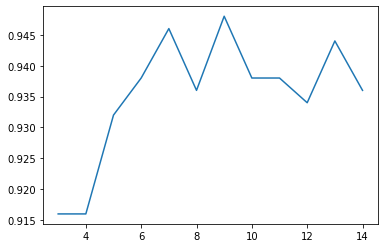

In [57]:
plt.plot(neighbours,acc_values)

In [58]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred5=classifier.predict(x_test)

In [59]:
print("Accuracy is ",accuracy_score(y_test,y_pred5)*100)
print("f1 score is ",f1_score(y_test,y_pred5,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred5))

Accuracy is  94.8
f1 score is  0.9470373936234162
Confusion Matrix 
 [[129   3   0   0]
 [  4 113   1   0]
 [  0  10 109   1]
 [  0   0   7 123]]


In [60]:
print('Accuracy is :',100*(f1_score(y_pred5, y_test,average='weighted')))

Accuracy is : 94.7812903678301


# SVM

In [61]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
acc_svc=accuracy_score(y_test,svc_pred)*100
print("Accuracy is:{}%".format(acc_svc))
print('confusion_matrix:\n',confusion_matrix(y_test,svc_pred))
#result = classification_report(svc_pred,y_test)

Accuracy is:95.19999999999999%
confusion_matrix:
 [[128   4   0   0]
 [  3 115   0   0]
 [  0   6 109   5]
 [  0   0   6 124]]


# Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
acc_nb=accuracy_score(y_test,nb_pred)*100
print("Accuracy is:{}%".format(acc_nb))
print('confusion_matrix:\n',confusion_matrix(y_test,nb_pred))
result = classification_report(nb_pred,y_test)

Accuracy is:79.2%
confusion_matrix:
 [[117  15   0   0]
 [ 12  85  21   0]
 [  0  17  85  18]
 [  0   0  21 109]]


In [63]:
test.shape

(1000, 20)

In [64]:
preds=svc.predict(test)
print("predicted value : ",preds[:10])


predicted value :  [3 3 2 3 1 3 3 1 3 0]


In [65]:
print("actual values   : ",y_test[:10].values)

actual values   :  [[0]
 [2]
 [1]
 [3]
 [1]
 [1]
 [2]
 [0]
 [3]
 [1]]


In [66]:
submission=pd.DataFrame()
submission['id']=dum
submission['price_range']=preds
submission     

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [67]:
submission.nunique()

id             1000
price_range       4
dtype: int64

In [68]:
submission['price_range'].value_counts()

0    259
3    257
2    255
1    229
Name: price_range, dtype: int64

In [69]:
submission.to_csv('C:\\Users\\Arun\\intern.csv',index=False)

In [70]:
df=pd.read_csv("inttrain.csv")

In [71]:
df1=df.rank()

In [72]:
df1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


# Ranking all features seperately

In [73]:
d_rank = df1
d_rank["rank_by_price"] = d_rank["price_range"].rank()
d_rank["rank_by_battery"] = d_rank["battery_power"].rank(ascending=False)
d_rank["rank_by_blueooth"] = d_rank["blue"].rank(ascending=False)
d_rank["rank_by_clockspeed"] = d_rank["clock_speed"].rank(ascending=False)
d_rank["rank_by_DualSIM"] = d_rank["dual_sim"].rank(ascending=False)
d_rank["rank_by_fc"] = d_rank["fc"].rank(ascending=False)
d_rank["rank_by_4G"] = d_rank["four_g"].rank(ascending=False)
d_rank["rank_by_InternalMemory"] = d_rank["int_memory"].rank(ascending=False)
d_rank["rank_by_mdep"] = d_rank["m_dep"].rank(ascending=False)
d_rank["rank_by_weight"] = d_rank["mobile_wt"].rank(ascending=True)
d_rank["rank_by_ncores"] = d_rank["n_cores"].rank(ascending=False)
d_rank["rank_by_pc"] = d_rank["pc"].rank(ascending=False)
d_rank["rank_by_height"] = d_rank["px_height"].rank(ascending=False)
d_rank["rank_by_width"] = d_rank["px_width"].rank(ascending=False)
d_rank["rank_by_ram"] = d_rank["ram"].rank(ascending=False)
d_rank["rank_by_sch"] = d_rank["sc_h"].rank(ascending=False)
d_rank["rank_by_scw"] = d_rank["sc_w"].rank(ascending=False)
d_rank["rank_by_talktime"] = d_rank["talk_time"].rank(ascending=False)
d_rank["rank_by_3G"] = d_rank["three_g"].rank(ascending=False)
d_rank["rank_by_touchscreen"] = d_rank["touch_screen"].rank(ascending=False)
d_rank["rank_by_wifi"] = d_rank["wifi"].rank(ascending=False)
d_rank.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,488.5,505.5,1476.0,491.0,597.0,479.0,180.5,1198.5,1783.5,366.0,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,722.5,1505.5,207.0,1491.0,237.5,1479.0,1666.5,1391.5,932.5,612.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,91.5,1505.5,207.0,1491.0,814.0,1479.0,1281.0,1797.0,1069.0,1132.5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,171.0,1505.5,1678.5,491.0,237.5,479.0,290.5,1595.5,846.0,1370.5,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1759.0,1505.5,807.5,491.0,1895.5,1479.0,1382.0,1198.5,1006.0,366.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [74]:
df1 = d_rank.iloc[:,21:]
df1

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


Ranked the features of a smartphone.